In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("./dataset/obradeni_podaci.csv")
data

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OAS2_0185,Demented,2,842,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
367,OAS2_0185,Demented,3,2297,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
368,OAS2_0186,Nondemented,1,0,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
369,OAS2_0186,Nondemented,2,763,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [6]:
data = data.groupby('Subject ID').first().reset_index()

data

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,Demented,1,0,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,Nondemented,1,0,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,Nondemented,1,0,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,Demented,1,0,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,Demented,1,0,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
146,OAS2_0183,Nondemented,1,0,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,Demented,1,0,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,Demented,1,0,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [7]:
data['Group'] = data['Group'].replace('Converted', 'Demented')
#data = data[data['Group'] != 'Converted']

In [8]:
data.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,Demented,1,0,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,Nondemented,1,0,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,Nondemented,1,0,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,Demented,1,0,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293


In [9]:
data.nunique()

Subject ID    150
Group           2
Visit           1
MR Delay        1
M/F             2
Age            34
EDUC           12
SES             6
MMSE           13
CDR             3
eTIV          131
nWBV           90
ASF           129
dtype: int64

In [10]:
unique_groups = data['Group'].unique()
print(unique_groups[:3])

['Nondemented' 'Demented']


1.Stablo odlučivanja



U svom projektu koristim stablo odlučivanja za predviđanje demencije kod osoba na temelju njihovih osobnih karakteristika ili značajki. Stablo odlučivanja pomaže u analizi podataka i donošenju zaključaka o demenciji na temelju dostupnih informacija poput dobi, spola, obrazovanja ili drugih relevantnih značajki. Ovim pristupom možemo stvoriti model koji predviđa prisutnost demencije na temelju tih karakteristika.

Pretvorba kategoričkih vrijednosti u numeričke

In [11]:
label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])

In [12]:
# Podijela podataka na značajke (X) i oznake (y)
selected_features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR']
X = data[selected_features]  # Odabir značajki za X
y = data['Group'] # Varijabla koju želim predviđati

Ovdje se koristi DecisionTreeClassifier iz Scikit-Learn-a za izgradnju modela stabla odlučivanja. Podaci se dijele na skup za učenje i testiranje pomoću train_test_split. Zatim se model trenira na skupu za učenje (fit) i koristi se za predviđanje (predict) na skupu za testiranje. Konačno, koristi se accuracy_score i confusion_matrix za evaluaciju performansi modela.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.fit_transform(y_test)

In [14]:
decision_tree = DecisionTreeClassifier(random_state=42)
# Inicijaliziram model stabla odlučivanja

In [15]:
decision_tree.fit(X_train, y_train)  # Treniranje modela

DecisionTreeClassifier(random_state=42)

In [16]:
y_predict_dt = decision_tree.predict(X_test)  # Predviđanja modela za testne podatke

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize your model (Decision Tree Classifier in this case)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=10)

# Calculate the mean accuracy of the cross-validation scores
mean_accuracy_dt = cv_scores_dt.mean()

print(f"Mean Accuracy using 10-fold Cross-Validation (Decision Tree): {mean_accuracy_dt}")

Mean Accuracy using 10-fold Cross-Validation (Decision Tree): 0.8200000000000001


In [18]:
cm_dt = confusion_matrix(y_test, y_predict_dt)
print("Matrica zabune:")
print(cm_dt)

Matrica zabune:
[[ 8  4]
 [ 3 15]]


In [19]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix = cm_dt, display_labels=decision_tree.classes_)

In [20]:
disp_dt.plot()

In [21]:
precision_dt = precision_score(y_test,y_predict_dt,average='micro')
recall_dt = recall_score(y_test, y_predict_dt,average='micro')
print("Precision : ",precision_dt)
print("Recall : ",recall_dt)

Precision :  0.7666666666666667
Recall :  0.7666666666666667


In [22]:
accuracy_dt = decision_tree.score(X_test, y_test)
print(f"Accuracy: {accuracy_dt}")

Accuracy: 0.7666666666666667


In [23]:
f1_dt = f1_score(y_test,y_predict_dt,average='micro')
print("F1_score: ", f1_dt)

F1_score:  0.7666666666666667


In [24]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

    Demented       0.73      0.67      0.70        12
 Nondemented       0.79      0.83      0.81        18

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30



In [25]:
decision_tree.classes_

array(['Demented', 'Nondemented'], dtype=object)

ROC (Receiver Operating Characteristic) curve i AUC (Area Under the Curve) krivulje

In [26]:
y_test_num = label_encoder.fit_transform(y_test)
#pretvaramo u numericke vrijednosti: 0 i 1 umjesto: 'Demented', 'Nondemented'

In [27]:
y_probs_dt = decision_tree.predict_proba(X_test)[:, 1] #dobiti vjerojatnosti samo za pozitivnu klasu.

In [28]:
fpr, tpr, thresholds = roc_curve(y_test_num, y_probs_dt)
auc = roc_auc_score(y_test_num, y_probs_dt)
auc

0.7500000000000002

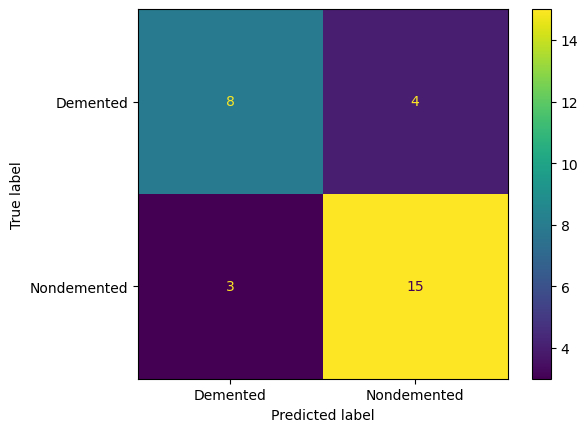

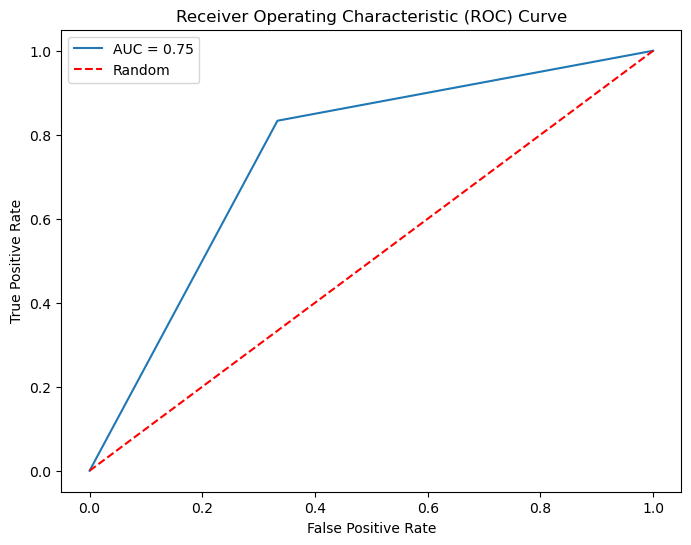

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

2.Random Forest

Model slučajne šume performira bolje od stabla odluke jer izbjegava problem prenaučenosti. Modeli temeljeni na slučajnim šumama sastoje se od različitih stabala odluke, svako malo drugačije od ostalih. Koristeći algoritam većinskog glasovanja, ansambl čini predviđanja na temelju svakog pojedinačnog modela stabla odluke (bagging). Kao rezultat, količina prenaučenosti se smanjuje dok se održava prediktivna sposobnost svakog stabla.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.fit_transform(y_test)


# Define hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4],
     'max_features': ['sqrt', 'log2', None]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)


In [31]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,  # Max depth of trees
    min_samples_leaf=2,  # Minimum samples per leaf
    max_features='sqrt',  # Number of features to consider at each split
    random_state=42  # Setting a random state for reproducibility
)

# Fit the model on your training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [32]:
predictions_rf = rf_classifier.predict(X_test)

In [33]:
accuracy_rf = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy_rf}")

Accuracy: 0.8


In [34]:
f1_rf = f1_score(y_test,predictions_rf,average='micro')
precision_rf = precision_score(y_test,predictions_rf,average='micro')
recall_rf = recall_score(y_test, predictions_rf,average='micro')
print("F1_score: ",f1_rf)
print("Precision : ",precision_rf)
print("Recall : ",recall_rf)

F1_score:  0.8000000000000002
Precision :  0.8
Recall :  0.8


In [35]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

    Demented       0.80      0.67      0.73        12
 Nondemented       0.80      0.89      0.84        18

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [36]:
cm_rf = confusion_matrix(y_test, predictions_rf)
print("Matrica zabune:")
print(cm_rf)

Matrica zabune:
[[ 8  4]
 [ 2 16]]


In [37]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels=rf_classifier.classes_)

In [38]:
disp_rf.plot()

ROC (Receiver Operating Characteristic) curve i AUC (Area Under the Curve) krivulje

ROC krivulje
Grafički prikaz izvedbe binarnog klasifikatora kao funkcija različitih pragova
korištenih pri klasifikaciji

Razina ispravno pozitivnih (TPR): To je omjer točno predviđenih pozitivnih primjera u odnosu na sve stvarne pozitivne primjere. 

Razina lažno pozitivnih (FPR): To je omjer neispravno predviđenih pozitivnih primjera u odnosu na sve stvarne negativne primjer

Veći AUC – bolji model.






In [39]:
y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1] #dobiti vjerojatnosti samo za pozitivnu klasu.

In [40]:
fpr, tpr, thresholds = roc_curve(y_test_num, y_probs_rf)
auc = roc_auc_score(y_test_num, y_probs_rf)
auc

0.8101851851851852

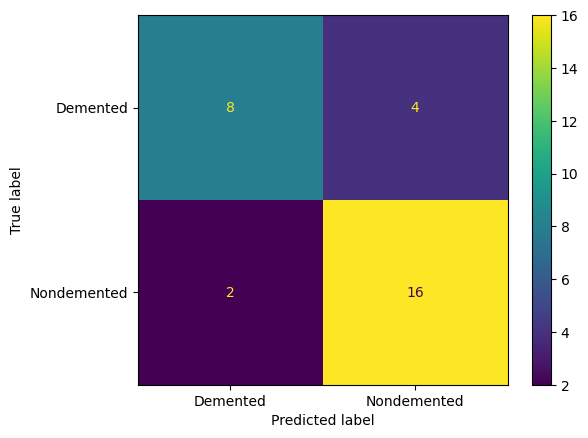

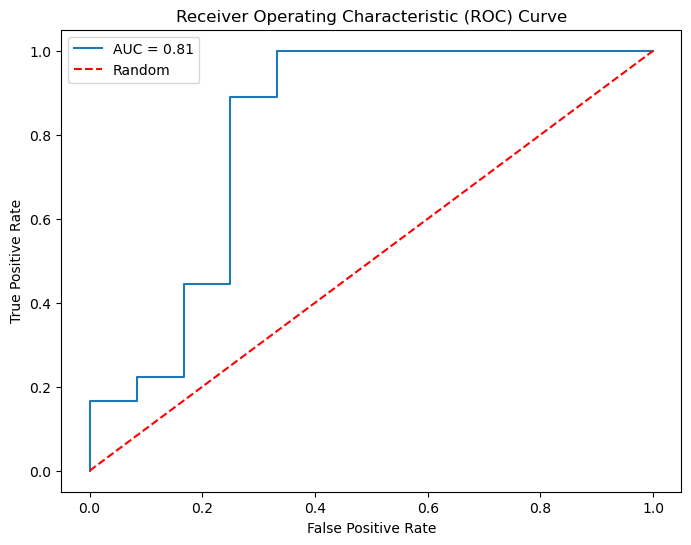

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

3.Support Vector Machine (SVM)

Ova metoda uključuje određivanje klase podataka pomoću odgovarajućih hiper-ravnina u višedimenzionalnom prostoru. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.fit_transform(y_test)

In [43]:
svm_classifier = SVC(kernel='linear', probability=True)  # You can specify the kernel type ('linear', 'rbf', 'poly', etc.)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [44]:
# Making predictions on the test set using the best estimator
y_predict_svm = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy_svm = accuracy_score(y_test, y_predict_svm)
print(f"Accuracy: {accuracy_svm}")

Accuracy: 0.8666666666666667


In [45]:
cm_svm = confusion_matrix(y_test, y_predict_svm)
print("Matrica zabune:")
print(cm_svm)

Matrica zabune:
[[ 8  4]
 [ 0 18]]


In [46]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels=svm_classifier.classes_)

In [47]:
disp_svm.plot()

In [48]:
f1_svm = f1_score(y_test,y_predict_svm,average='micro')
print("F1_score: ",f1_svm)
precision_svm = precision_score(y_test, y_predict_svm,average='micro')
recall_svm = recall_score(y_test,y_predict_svm,average='micro')
print("Precision : ",precision_svm)
print("Recall : ",recall_svm)

F1_score:  0.8666666666666667
Precision :  0.8666666666666667
Recall :  0.8666666666666667


In [49]:
print(classification_report(y_test,y_predict_svm,  zero_division=1))

              precision    recall  f1-score   support

    Demented       1.00      0.67      0.80        12
 Nondemented       0.82      1.00      0.90        18

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30



ROC (Receiver Operating Characteristic) curve i AUC (Area Under the Curve) krivulje

In [50]:
y_probs_svm = svm_classifier.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test_num, y_probs_svm)
auc = roc_auc_score(y_test_num, y_probs_svm)
auc

0.875

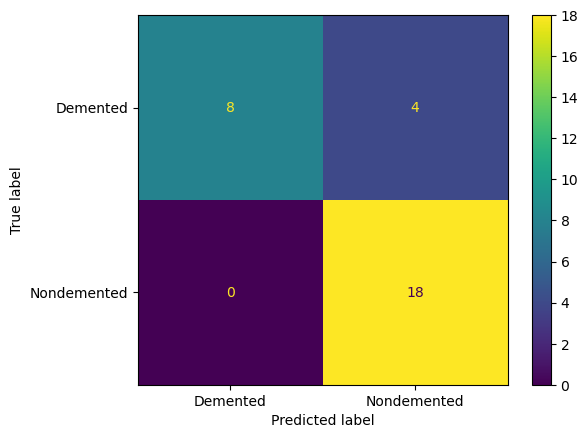

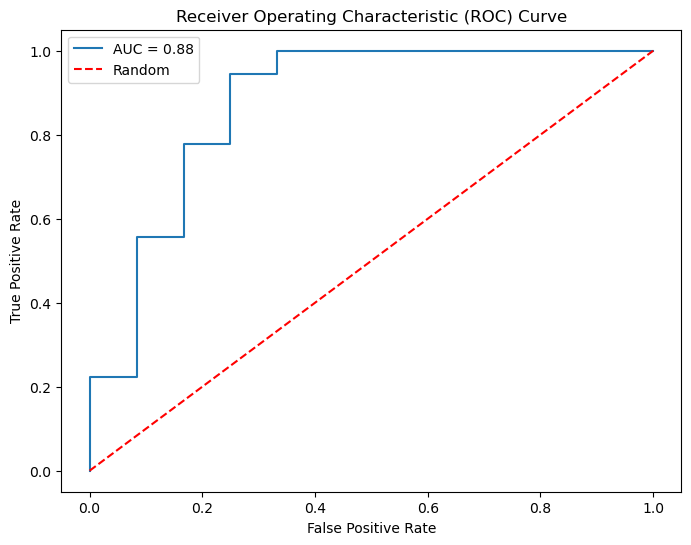

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

4. XGBoost

 Proces implementacije gradijentno pojačanih stabala odlučivanja za maksimalnu brzinu i performanse.

In [53]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
y_predict_xgb = xgb_classifier.predict(X_test)  # Predviđanja modela za testne podatke

In [55]:
cm_xgb = confusion_matrix(y_test_num, y_predict_xgb)
print("Matrica zabune:")
print(cm_xgb)

Matrica zabune:
[[ 8  4]
 [ 3 15]]


In [56]:
disp_xgb = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels=xgb_classifier.classes_)
disp_xgb.plot()

In [57]:
f1_xgb = f1_score(y_test_num,y_predict_xgb,average='micro')
print("F1_score: ",f1_xgb)
precision_xgb = precision_score(y_test_num, y_predict_xgb,average='micro')
recall_xgb = recall_score(y_test_num,y_predict_xgb,average='micro')
print("Precision : ",precision_xgb)
print("Recall : ",recall_xgb)

F1_score:  0.7666666666666667
Precision :  0.7666666666666667
Recall :  0.7666666666666667


In [58]:
accuracy_xgb = xgb_classifier.score(X_test, y_test_num)
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.7666666666666667


In [59]:
print(classification_report(y_test_num,y_predict_xgb))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.79      0.83      0.81        18

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30



In [60]:
y_probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1] #dobiti vjerojatnosti samo za pozitivnu klasu.

In [61]:
fpr, tpr, thresholds = roc_curve(y_test_num, y_probs_xgb)
auc = roc_auc_score(y_test_num, y_probs_xgb)
auc

0.7453703703703705

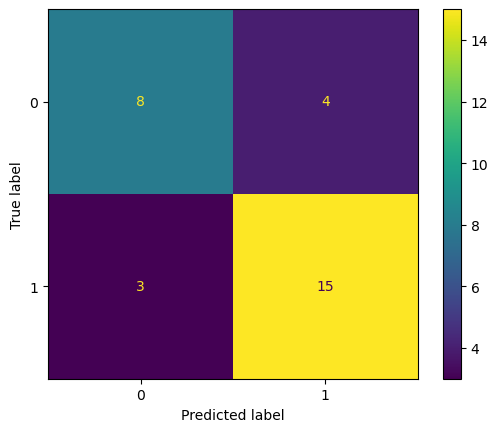

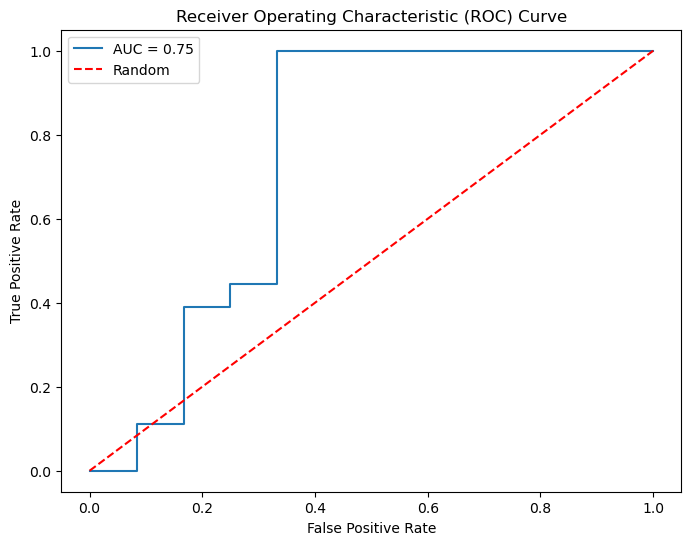

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

5. Voting

Jedan od najjednostavnijih načina kombiniranja predviđanja iz više algoritama za učenje. Glasajući klasifikatori zapravo nisu klasifikatori, već više podsjećaju na omotače (wrappere) za više klasifikatora koji su trenirani i evaluirani istovremeno kako bi se iskoristile njihove specifične karakteristike. 

Hard voting: Klasa s najviše glasova bit će odabrana u ovom slučaju.
 (Soft votig): Ovo uključuje zbrajanje vektora vjerojatnosti za svaku predviđenu klasu (za sve klasifikatore) i odabir one koja predstavlja najvišu vrijednoi).

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.fit_transform(y_test)

In [64]:
# Initialize individual classifiers
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
# Create a voting classifier (both hard and soft voting)
voting_clf_hard = VotingClassifier(
    estimators=[('lr', logistic_clf), ('dt', tree_clf), ('svm', svm_clf), ('rf', rf_clf)],
    voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[('lr', logistic_clf), ('dt', tree_clf), ('svm', svm_clf), ('rf', rf_clf)],
    voting='soft'
)
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)

gb_classifier = GradientBoostingClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('svm', svm_classifier), ('logistic', logistic_classifier), ('gb', gb_classifier)],
    voting='soft'
)

In [66]:
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [67]:
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [68]:
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)

In [69]:
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f'Accuracy (Hard Voting): {accuracy_hard}')
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy voting: {accuracy_voting}')

Accuracy (Hard Voting): 0.7333333333333333
Accuracy voting: 0.8666666666666667


In [70]:
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f'Accuracy (Soft Voting): {accuracy_soft}')

Accuracy (Soft Voting): 0.8


In [71]:
f1_soft = f1_score(y_test,y_pred_voting,average='micro')
print("F1_score: ",f1_soft)
precision_soft = precision_score(y_test, y_pred_voting,average='micro')
recall_soft = recall_score(y_test,y_pred_voting,average='micro')
print("Precision : ",precision_soft)
print("Recall : ",recall_soft)

F1_score:  0.8666666666666667
Precision :  0.8666666666666667
Recall :  0.8666666666666667


In [72]:
conf_matrix_soft = confusion_matrix(y_test, y_pred_voting)
print("Matrica zabune:")
print(conf_matrix_soft)

Matrica zabune:
[[ 8  4]
 [ 0 18]]


In [73]:
disp_soft = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_soft, display_labels=voting_clf_soft.classes_)
disp_soft.plot()

In [74]:
print(classification_report(y_test,y_pred_soft))

              precision    recall  f1-score   support

    Demented       0.80      0.67      0.73        12
 Nondemented       0.80      0.89      0.84        18

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



ROC (Receiver Operating Characteristic) curve i AUC (Area Under the Curve) krivulje

In [75]:
y_probs_soft = voting_clf_soft.predict_proba(X_test)[:, 1]

In [76]:
fpr, tpr, thresholds = roc_curve(y_test_num, y_probs_soft)
auc = roc_auc_score(y_test_num, y_probs_soft)
auc

0.7962962962962963

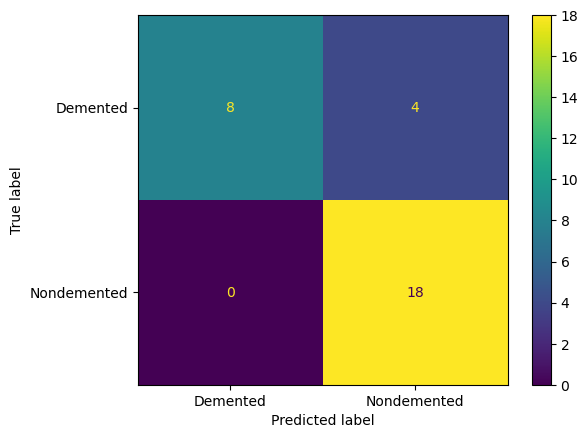

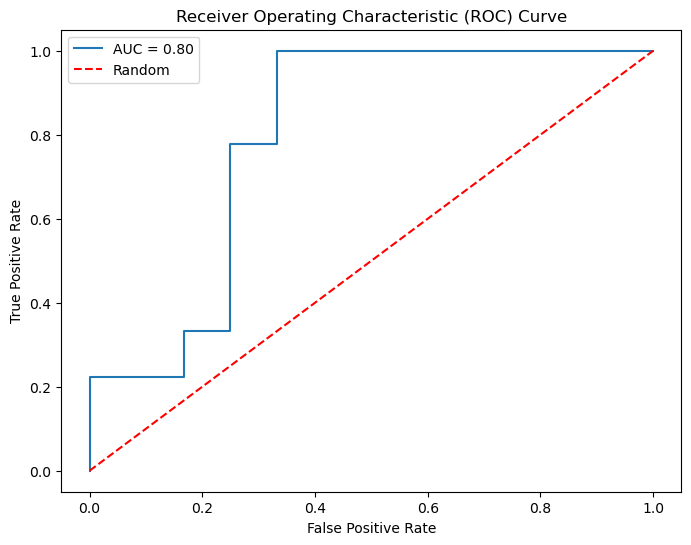

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Comparison of accuracy

In [88]:
classifiers = ["Decision Tree", "Random Forest", "SVM", "XGBoost", "Voting"]
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_xgb, accuracy_soft]
accuracies

[0.7666666666666667, 0.8, 0.8666666666666667, 0.7666666666666667, 0.8]

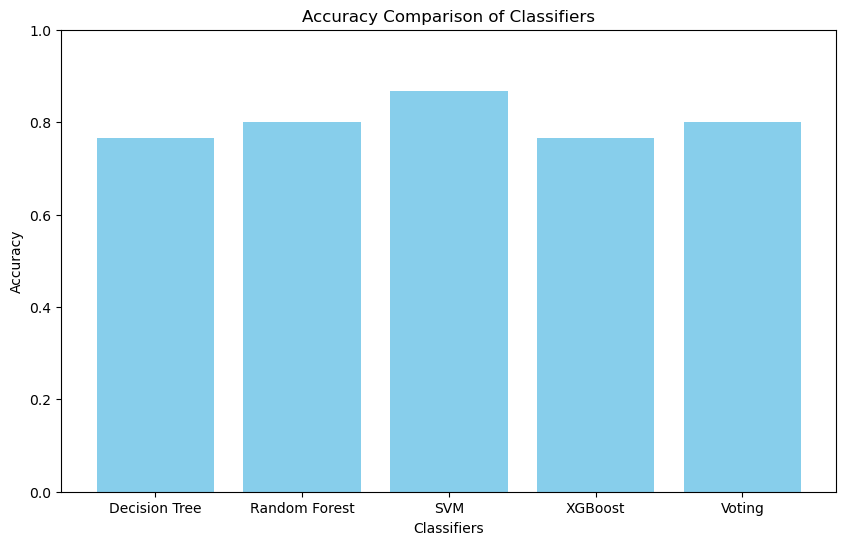

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # Set the y-axis limit for better visualization
plt.show()

In [80]:
classifiers = ["Decision Tree", "Random Forest", "SVM", "XGBoost", "Voting"]
precision_all = [precision_dt, precision_rf, precision_svm, precision_xgb, precision_soft] 
precision_all

[0.7666666666666667,
 0.8,
 0.8666666666666667,
 0.7666666666666667,
 0.8666666666666667]

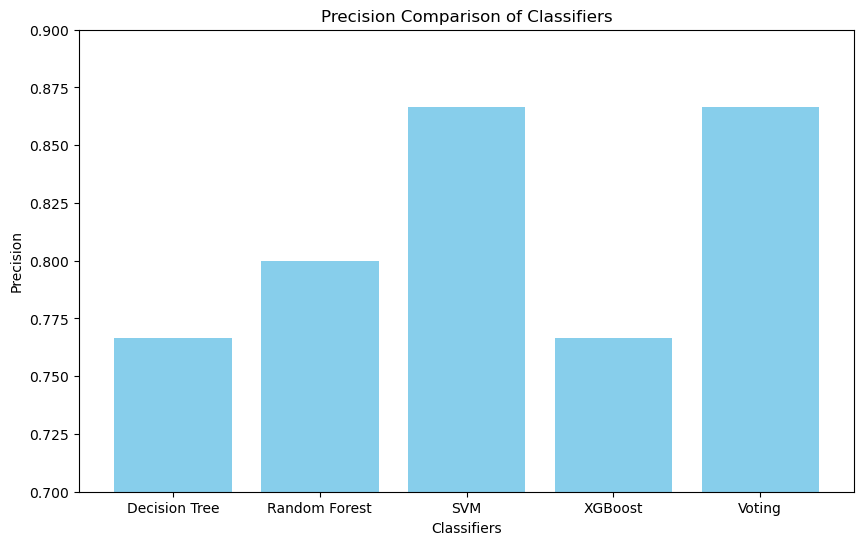

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers, precision_all, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Precision Comparison of Classifiers')
plt.ylim(0.7, 0.9)  # Set the y-axis limit for better visualization
plt.show()

In [86]:
classifiers = ["Decision Tree", "Random Forest", "SVM", "XGBoost", "Voting"]
recall_all = [recall_dt, recall_rf, recall_svm, recall_xgb,recall_soft] 
recall_all

[0.7666666666666667,
 0.8,
 0.8666666666666667,
 0.7666666666666667,
 0.8666666666666667]

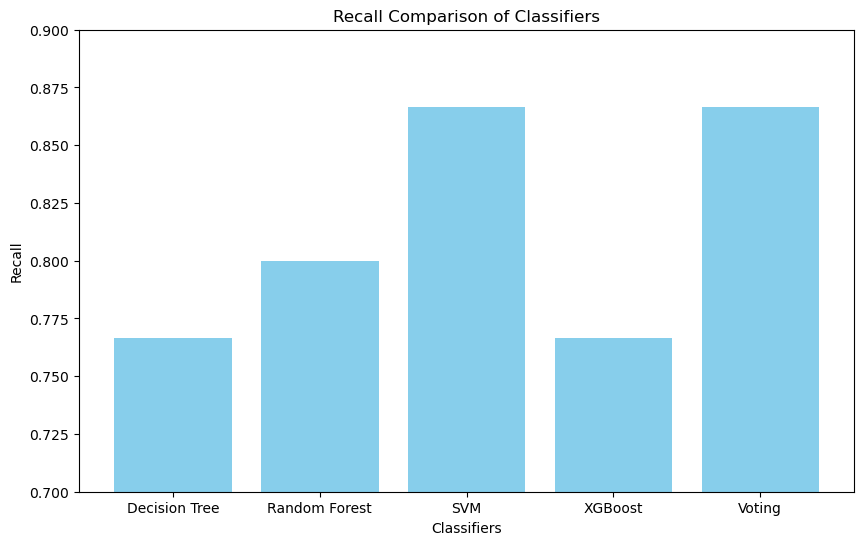

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers,recall_all, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title('Recall Comparison of Classifiers')
plt.ylim(0.7, 0.9)  # Set the y-axis limit for better visualization
plt.show()

In [87]:
classifiers = ["Decision Tree", "Random Forest", "SVM", "XGBoost", "Voting"]
f1_all = [f1_dt, f1_rf, f1_svm, f1_xgb,f1_soft] 
f1_all

[0.7666666666666667,
 0.8000000000000002,
 0.8666666666666667,
 0.7666666666666667,
 0.8666666666666667]

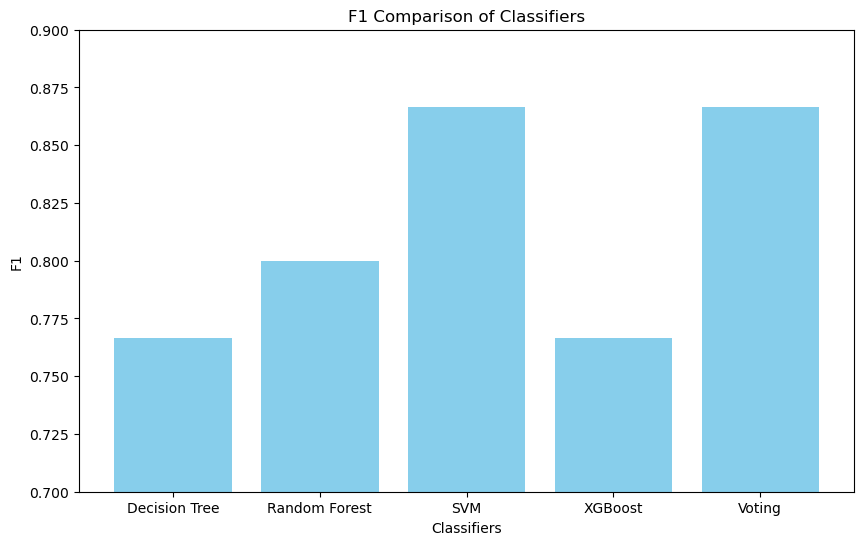

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers,f1_all, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('F1')
plt.title('F1 Comparison of Classifiers')
plt.ylim(0.7, 0.9)  # Set the y-axis limit for better visualization
plt.show()